# API Over view

what is API? A set of rules that allows software programs to communicate with each other. It defines how requests for services or data should be made and how responses should be returned.

What is an HTTP method? The types of actions you can perform when making an API request over the web(HTTP stands for Hyper Text Transfer Protocol)

Common HTTP types

GET: Retrieves data e.g get a user's info

POST: Sends data e.g create a new user

PUT: Updates existing data

DELETE: Removes data

# API Parameters and Headers
API parameter: options that can be passed with the end point to influence/ filter response from all the time to last a year, specify which token, etc.

Path parameter: Part of the URL path itself, used to identify a specific resource(coin/{coin}/history)

Query parameter: Added at the end of the URL, after a ? and used to filter or modify the data you get back? e.g ?date=30-12-2024

API Header: refers to metadata set along with the HTTP request or response(sometimes used for aunthentication)

### What are response codes?
These are numbers returned by a server to show the result of an API request

### Examples include;
200 OK: Request succeeded.

201 created: New resource created after e.g a POST.

400 Bad request: The request was invalid.

401 Unauthorized: Authentication is needed or failed.

404 Not Found: Resource doesnt exist.

500 Internal Server Error: Something went wrong on the server.

### Blockchain Data APIs

# Ether Scan:

Use cases include: used to extract transaction data, smart contract events and address balances.


### Getting started
1 API Key
2 Identiy chain ID

## CoinGecko:


Use cases:Crypto prices and market data

### Getting started
1 API Key

## Requests Libray

### Use cases:
Allows you to send HTTP requests extremely easily.

We can call end points by passing the URL and other data to the requests object.

A response object is returned.

### Example

In [10]:
import requests
r=requests.get('https://api.github.com/events') #--> Gets github's public timeline.
print(r.status_code) # Prints the HTTP status code of the response (200means Ok)
print(r.json()) # Parses and prints the JSON response body as Python objects (list/dict)

# As you may notice, we are using the get method which we covered earlier. Requests library essentially uses the same syntax
# for ease of use. If we need to make a POST request, we would do

# requests.post
response = requests.post('https://httpbin.org/post', json={'key':'value'})
print(response.status_code)
print(response.json())


200
[{'id': '53116133228', 'type': 'PushEvent', 'actor': {'id': 7000106, 'login': 'lewlh', 'display_login': 'lewlh', 'gravatar_id': '', 'url': 'https://api.github.com/users/lewlh', 'avatar_url': 'https://avatars.githubusercontent.com/u/7000106?'}, 'repo': {'id': 142769620, 'name': 'lewlh/lewlh.github.io', 'url': 'https://api.github.com/repos/lewlh/lewlh.github.io'}, 'payload': {'repository_id': 142769620, 'push_id': 26011362816, 'size': 2, 'distinct_size': 2, 'ref': 'refs/heads/master', 'head': '737fcd6e8f214ccd8f575c3aecd2338cd9019feb', 'before': '18865d791ef124b70fb34a1fe26345526381bb60', 'commits': [{'sha': '8a3684b879898aa2b8c39a18760e948264e9528e', 'author': {'email': 'szjzllh@gmail.com', 'name': 'lewlh'}, 'message': 'First commit', 'distinct': True, 'url': 'https://api.github.com/repos/lewlh/lewlh.github.io/commits/8a3684b879898aa2b8c39a18760e948264e9528e'}, {'sha': '737fcd6e8f214ccd8f575c3aecd2338cd9019feb', 'author': {'email': 'szjzllh@gmail.com', 'name': 'lewlh'}, 'message': "

# Environment
1 Create a .env file in the project root directory
2 Write:

ETHERSCAN_API KEY=

COINGECKO_API_KEY=

In [5]:

import requests # importing the requests lib making HTTP requests
import pandas as pd # import pandas for data mainpulation and array syntax
import json # importing Json for handling JSON data
import numpy as np # importing numpy for numerical operations
import os # importing os for operating system functionality
from dotenv import load_dotenv # importing load_dotenv to load environment variables from a .env file.

In [44]:
# Load the environment variables
load_dotenv()

ETHERSCAN_API_KEY=os.getenv('ETHERSCAN_API_KEY') # Fetching the etherscan API key from the environment
COINGECKO_API_KEY=os.getenv('COINGECKO_API_KEY') # Fetching the coinpaprika API key from the environment variable

In [45]:
if not ETHERSCAN_API_KEY or not COINGECKO_API_KEY:
    raise ValueError("Please set the ETHERSCAN_API_KEY and COINGECKO_API_KEY environment variables.")

In [46]:
etherscan_url='https://api.etherscan.io/v2/api' # Etherscan API end point we will be using.

### Get ether balance for a specific address using ether scan API.

In [ ]:
# We structure parameters as a dictionary to allow for easy expansion in future.
# If we need to add more parametrs, we can simply add them to this dictionary.

params={
    'chainid': 1, #chain ID for Ethereum Mainnet.
    'module' : 'account', # Module for account related actions.
    'action' : 'balance', #Action to get the account balance.
    'address' : '0xca8fa8f0b631ecdb18cda619c4fc9d197c8affca',
    'tag' : 'latest', # Tag to specify the latest block.
    'apikey' : ETHERSCAN_API_KEY # API key for Etherscan
}

r=requests.get(etherscan_url, params=params) # Making the GET request to Etherscan API.
r.raise_for_status() # raise an error for bad responses(4xx or 5xx status codes)
data=r.json() # parsing the JSON response.

In [149]:
# Display the data
print(f'API Response:\n{json.dumps(data,indent=4)}') # pretty print the JSON dat with an indentation of 4 spaces.

API Response:
{
    "status": "1",
    "message": "OK",
    "result": "325000482443745707638427"
}


In [150]:
print(data)


{'status': '1', 'message': 'OK', 'result': '325000482443745707638427'}


In [151]:
type(data) # checks the type of data. Python interprets it as a dictionary, which is a key value pair structure.

dict

In [52]:
data.keys() #displays the keys of the response

dict_keys(['status', 'message', 'result'])

In [53]:
data['status'] # displays the status of the response(1 means success , 0 means error).

'1'

In [54]:
data['message'] # lets us know there was an error or not.

'OK'

In [152]:
data['result'] # displays the result of the response which contains the account balance(raw value)

'325000482443745707638427'

In [ ]:
# convert the balance from Wei to Ether.
# We are able to parse the  balance from JSON response similar to how we would parse a dictionary in python.

balance_wei=int(data['result']) #extracting the balance from response in wei.
balance_ether= balance_wei/10*18 # converting wei to ether
print(f'Balance in Ether:{balance_ether}') # displaying the balance in ether.

Balance in Ether:5.850008683987423e+23


### Get transaction status by transaction hash

confirms that transaction actually happened

In [ ]:
params={ 
    'chainid':1, # Chain ID for the Ethereum mainnet.
    'module': 'transaction', # Module for account related activities.
    'action': 'gettxreceiptstatus', # Action to get the account.
    'txhash': '0x198788c7f4494fa9150f0e227ed423889364e1461350690613ff4c1b8e534d2a',
    'apikey': ETHERSCAN_API_KEY # API key for Etherscan.
}

r=requests.get(etherscan_url,params=params) # Making the GET request to Etherscan API.
r.raise_for_status() # Raise an error for bad responses(4xx or 5xx status codes)
data=r.json() # parsing the JSON response.

In [71]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # pretty print the JSON data with an indentation of 4 spaces

API Response:
{
    "status": "1",
    "message": "OK",
    "result": {
        "status": "1"
    }
}


### Get "Normal" transactions for a specific address using Etherscan API.

Normal transactions are those ones that are not contract interactions or informal transactions. This returns a maximum of 1000 per query, so if you need more, you will have to tag a date using block numbers

In [ ]:
params={ 
    'chainid':1, # Chain ID for the Ethereum mainnet.
    'module': 'account', # Module for account related actions.
    'action': 'txlist', # Action to get the account balance.
    'address': '0xd3a1b093fec1f2d1Ab39a31E4eD9041b02EC0eE5',
    'startblock': 0, # Tag to specify the latest block.
    'endblock': 99999999, # Tag to specify the latest block
    # 'page': 1,
    # 'offset': 100,
    # 'sort': 'asc',
    'apikey': ETHERSCAN_API_KEY # API key for Etherscan.
}

r=requests.get(etherscan_url,params=params) # Making the GET request to Etherscan API.
r.raise_for_status() # Raise an error for bad responses(4xx or 5xx status codes)
data=r.json() # parsing the JSON response

In [97]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # pretty print the JSON data with an indentation of 4 spaces

API Response:
{
    "status": "0",
    "message": "No transactions found",
    "result": []
}


In [90]:
# Lets extract the transactions from the response and convert it to a pandandas DataFrame
transactions=data['result'] # Extracting transactions from the response.
df=pd.DataFrame(transactions) # Converting transactions to a pandas DataFrame
df.head()

Empty DataFrame
Columns: []
Index: []

In [98]:
# To look up specific transaction, we can use the transaction hash



### Get event logs for a specific address using Etherscan API

Events usually contain about the state of changes in the contract, such as transfers, approvals etc.

Event logs are used to track events remitted by smart contracts

In [ ]:
params={
   'chainid':1, # Chain ID for the Ethereum mainnet.
    'module': 'logs', # Module for account related actions.
    'action': 'getlogs', # Action to get the account balance.
    'address': '0xbd3531da5cf5857e7cfaa92426877b022e612cf8', # Contract address
    'startblock': 12878196, # Tag to specify the latest block.
    'endblock': 12878196, # Tag to specify the latest block
    'apikey': ETHERSCAN_API_KEY # API key for Etherscan. 
}

r=requests.get(etherscan_url,params=params) # Making the GET request to Etherscan API.
r.raise_for_status() # Raise an error for bad responses(4xx or 5xx status codes)
data=r.json() # parsing the JSON response

In [102]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # pretty print the JSON data with an indentation of 4 spaces

API Response:
{
    "status": "1",
    "message": "OK",
    "result": [
        {
            "address": "0xbd3531da5cf5857e7cfaa92426877b022e612cf8",
            "topics": [
                "0x8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e0",
                "0x0000000000000000000000000000000000000000000000000000000000000000",
                "0x000000000000000000000000e9da256a28630efdc637bfd4c65f0887be1aeda8"
            ],
            "data": "0x",
            "blockNumber": "0xc47993",
            "blockHash": "0x13e906e02f1139e192dd23116e06275cc6d5e5a3447cb9e8085b1a041283ff92",
            "timeStamp": "0x60f963d9",
            "gasPrice": "0x4a817c800",
            "gasUsed": "0x415dfd",
            "logIndex": "0x8",
            "transactionHash": "0xe632f3e39c73b57a160c44451ff4ba8f19b80a0e60ab54a4e686a0f0687d81d4",
            "transactionIndex": "0x3"
        },
        {
            "address": "0xbd3531da5cf5857e7cfaa92426877b022e612cf8",
            "topics"

In [103]:
# Extract the event logs from the response and convert it to a pandas DataFrame

logs=data['result'] #Extracting transactions from the response
df=pd.DataFrame(logs) # Converting the transaction to a pandas DataFrame
df.head()

address  \
0  0xbd3531da5cf5857e7cfaa92426877b022e612cf8   
1  0xbd3531da5cf5857e7cfaa92426877b022e612cf8   
2  0xbd3531da5cf5857e7cfaa92426877b022e612cf8   
3  0xbd3531da5cf5857e7cfaa92426877b022e612cf8   
4  0xbd3531da5cf5857e7cfaa92426877b022e612cf8   

                                              topics  \
0  [0x8be0079c531659141344cd1fd0a4f28419497f9722a...   
1  [0x62e78cea01bee320cd4e420270b5ea74000d11b0c9f...   
2  [0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...   
3  [0x645f26e653c951cec836533f8fe0616d301c20a1715...   
4  [0x5db9ee0a495bf2e6ff9c91a7834c1ba4fdd244a5e8a...   

                                                data blockNumber  \
0                                                 0x    0xc47993   
1  0x000000000000000000000000e9da256a28630efdc637...    0xc47993   
2                                                 0x    0xc479f6   
3                                                 0x    0xc479f6   
4  0x000000000000000000000000e9da256a28630efdc637...    0xc4816e   

                                           blockHash   timeStamp     gasPrice  \
0  0x13e906e02f1139e192dd23116e06275cc6d5e5a3447c...  0x60f963d9  0x4a817c800   
1  0x13e906e02f1139e192dd23116e06275cc6d5e5a3447c...  0x60f963d9  0x4a817c800   
2  0x62d9dff817862d975a478b8cba7c50342f0ec3f29977...  0x60f96922  0x572365f42   
3  0x62d9dff817862d975a478b8cba7c50342f0ec3f29977...  0x60f96922  0x572365f42   
4  0x9d510559dba6ba79f2945ff241572d181f90cf64b510...  0x60f9ce26  0x49c2c0600   

    gasUsed logIndex                                    transactionHash  \
0  0x415dfd      0x8  0xe632f3e39c73b57a160c44451ff4ba8f19b80a0e60ab...   
1  0x415dfd      0x9  0xe632f3e39c73b57a160c44451ff4ba8f19b80a0e60ab...   
2   0x1f7e3     0xac  0x5de14778174290ec856c6f3bf0aff822a3e91a3c3274...   
3   0x1f7e3     0xad  0x5de14778174290ec856c6f3bf0aff822a3e91a3c3274...   
4    0x6fbd    0x10c  0xb1614b67923d5fb8e3ab9b4112c39836e3b0b1519555...   

  transactionIndex  
0              0x3  
1              0x3  
2             0x3b  
3             0x3b  
4             0x7f

### Get event logs filtered by topics

### Get ERC20-Token total supply by contract address

In [ ]:
params={
    'chainid':1, # Chain ID for the Ethereum mainnet.
    'module': 'stats', # Module for account related actions.
    'action': 'tokensupply', # Action to get total supply of a token.
    'contractaddress': '0x6b175474e89094c44da98b954eedeac495271d0f', # Contract address of token DAI
    'apikey': ETHERSCAN_API_KEY # API key for Etherscan. 
}

r=requests.get(etherscan_url,params=params) # Making the GET request to Etherscan API.
r.raise_for_status() # Raise an error for bad responses(4xx or 5xx status codes)
data=r.json() # parsing the JSON response

In [107]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # pretty print the JSON data with an indentation of 4 spaces

API Response:
{
    "status": "1",
    "message": "OK",
    "result": "3779714626976438994022387812"
}


In [109]:
# Convert the balance from Wei to Ether
balance_wei=int(data['result']) # Extracting the balance in Wei from the response.
balance_ether=balance_wei/10**18 # Converting Wei to Ether.
print(f'Total supply:{balance_ether:,.2f} DAI') # Displaying the total supply.

Total supply:3,779,714,626.98 DAI


### Get ERC20-Token Account balance to Token Contract Address.

In [ ]:
params={
    'chainid':1, # Chain ID for the Ethereum mainnet.
    'module': 'account', # Module for account related actions.
    'action': 'tokenbalance', # Action to get total supply of a token.
    'contractaddress': '0x6b175474e89094c44da98b954eedeac495271d0f', # Contract address of token BAT
    'address': '0xf6e720b5454dd049d0788e411b06cfAF16853042', # SKY peg stability Module Address(helps keep the price of SKY stable)
    'apikey': ETHERSCAN_API_KEY # API key for Etherscan. 
}
try:
    r=requests.get(etherscan_url,params=params) # Making the GET request to Etherscan API.
    r.raise_for_status() # Raise an error for bad responses(4xx or 5xx status codes)
    data=r.json() # parsing the JSON response
except requests.exceptions.HTTPError as error:
    print(f'HTTPerror occured:{error}')
except requests.exceptions.RequestException as error: # This catches other requests exceptions (connection issues, timeouts, etc.)
     print(f'Request error occurred: {error}')
else:
    # Optional: code here runs only if no exception was raised
    print(data)


{'status': '1', 'message': 'OK', 'result': '0'}


In [137]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # pretty print the JSON data with an indentation of 4 spaces

API Response:
{
    "status": "1",
    "message": "OK",
    "result": "0"
}


In [ ]:
params={
    'chainid':1, # Chain ID for the Ethereum mainnet.
    'module': 'account', # Module for account related actions.
    'action': 'tokenbalance', # Action to get total supply of a token.
    'contractaddress': '0x0d8775f648430679a709e98d2b0cb6250d2887ef', # Contract address of token BAT.
    'address': '0xfd821d8cea64feacb6ec86d979e37bc64c64a00b', # wallet address.
    'tag':'latest', 
    'apikey': ETHERSCAN_API_KEY # API key for Etherscan. 
}

r=requests.get(etherscan_url,params=params) # Making the GET request to Etherscan API.
r.raise_for_status() # Raise an error for bad responses(4xx or 5xx status codes)
data=r.json() # parsing the JSON response

In [ ]:
spaces# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # pretty print the JSON data with an indentation of 4 spaces.

API Response:
{
    "status": "1",
    "message": "OK",
    "result": "204189314322417588181827524"
}


In [145]:
# Convert the balance from Wei to Ether

balance_wei=int(data['result']) # Extracting the balance in Wei from the response.
balance_ether=balance_wei/10**18 # Converting Wei to Ether.
print(f'Total supply:{balance_ether:,.2f} BAT') # Displaying the total supply.

Total supply:204,189,314.32 BAT


### Gas Tracker Metrics

#### Gas oracle prices (for priority fee)

The gas prices are returned in Gwei.

In [ ]:
params={
    'chainid': 1, #chain ID for Ethereum Mainnet.
    'module' : 'gastracker', # Module for account related actions.
    'action' : 'gasoracle', #Action to get gas oracle.
    'apikey' : ETHERSCAN_API_KEY # API key for Etherscan
}

r=requests.get(etherscan_url,params=params) # Making the GET request to Etherscan API.
r.raise_for_status() # Raise an error for bad responses(4xx or 5xx status codes)
data=r.json() # parsing the JSON response

In [157]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # pretty print the JSON data with an indentation of 4 spaces.

API Response:
{
    "status": "1",
    "message": "OK",
    "result": {
        "LastBlock": "23097201",
        "SafeGasPrice": "1.405354557",
        "ProposeGasPrice": "1.439527357",
        "FastGasPrice": "1.496244556",
        "suggestBaseFee": "1.404527357",
        "gasUsedRatio": "0.149812333333333,0.828436329023169,0.243953499777789,0.765228933333333,0.423770866666667"
    }
}


# Coin Gecko

In [158]:
coingecko_url='https://api.coingecko.com/api/v3' # Coingeko API end point we will be using.

In [159]:
headers={
    "accept": "application/json",
    "x_cg_demo_api_key": COINGECKO_API_KEY # Using the API key for authentication.
}

In [160]:
# Check API server status.

r=requests.get(coingecko_url+'/ping', headers=headers) #making the GET request to Coingecko API.
r.raise_for_status() #Raises an error for bad responses(4xx or 5xx status codes)
data=r.json() # Parsing the JSON response.

In [161]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # Pretty print the JSON data with an indentation of 4 spaces.

API Response:
{
    "gecko_says": "(V3) To the Moon!"
}


Coin gecko API allows us to get a list of all coins available on the platform. This is very useful for getting the list of tokens and other IDs, which can be used to do another of things.

In [163]:
r=requests.get(coingecko_url+'/coins/list', headers=headers) # Making the GET request to The coingecko API.
r.raise_for_status( ) # Raises an error for bad responses(4xx or 5xx status codes).
data=r.json() # Parsing the JSON response.
print(f'API Response: \n{json.dumps(data, indent=4)}') # Pretty print the JSON data with an indentation of 4 spaces.

API Response: 
[
    {
        "id": "_",
        "symbol": "gib",
        "name": "\u0f3c \u3064 \u25d5_\u25d5 \u0f3d\u3064"
    },
    {
        "id": "000-capital",
        "symbol": "000",
        "name": "000 Capital"
    },
    {
        "id": "0chain",
        "symbol": "zcn",
        "name": "Zus"
    },
    {
        "id": "0dog",
        "symbol": "0dog",
        "name": "Bitcoin Dogs"
    },
    {
        "id": "0-knowledge-network",
        "symbol": "0kn",
        "name": "0 Knowledge Network"
    },
    {
        "id": "0vix-protocol",
        "symbol": "vix",
        "name": "0VIX Protocol"
    },
    {
        "id": "0x",
        "symbol": "zrx",
        "name": "0x Protocol"
    },
    {
        "id": "0x0-ai-ai-smart-contract",
        "symbol": "0x0",
        "name": "0x0.ai: AI Smart Contract"
    },
    {
        "id": "0x678-landwolf-1933",
        "symbol": "wolf",
        "name": "Landwolf"
    },
    {
        "id": "0xgasless-2",
        "symbol": "0xgas",
   

In [165]:
type(data) # Check the type of data

list

In [166]:
data[1].keys() # Display the keys of the first coin in the response.

dict_keys(['id', 'symbol', 'name'])

In [169]:
data[1] ['id'] # Extract the ID of the coin in the responding index.

'000-capital'

### Market Data for Supplied coins.

This end point returns the cureent market data for a specific coin, including its price, market cap etc.

In [173]:
params={
    'vs_currency': 'usd',
    'order': 'market_cap_desc', # Specifying order of market cap results.
    'per_page': 10, # Specifying the number of results per page.
    'page': 1, #Specifying the page number.
}

r=requests.get(coingecko_url+'/coins/markets', params=params, headers=headers)
r.raise_for_status() # Raises an error for bad responses(4xx or 5xx status codes.)
data=r.json() # Parsing the JSON response.

In [174]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # Pretty print JSON response with an indentation of 4 spaces.

API Response:
[
    {
        "id": "bitcoin",
        "symbol": "btc",
        "name": "Bitcoin",
        "image": "https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400",
        "current_price": 116118,
        "market_cap": 2313216890573,
        "market_cap_rank": 1,
        "fully_diluted_valuation": 2313216890573,
        "total_volume": 37411956787,
        "high_24h": 117596,
        "low_24h": 115979,
        "price_change_24h": -550.7892771916231,
        "price_change_percentage_24h": -0.4721,
        "market_cap_change_24h": -10396595391.000488,
        "market_cap_change_percentage_24h": -0.44743,
        "circulating_supply": 19903696.0,
        "total_supply": 19903696.0,
        "max_supply": 21000000.0,
        "ath": 122838,
        "ath_change_percentage": -5.44047,
        "ath_date": "2025-07-14T07:56:01.937Z",
        "atl": 67.81,
        "atl_change_percentage": 171197.34687,
        "atl_date": "2013-07-06T00:00:00.000Z",
        "roi":

In [175]:
btc_price=data[0] ['current_price'] # Extracting the current price of bitcoin.
print(f'Current Bitcoin price: ${btc_price: ,.2f}') # Display the current price of Bitcoin.

Current Bitcoin price: $ 116,118.00


In [177]:
btc_symbol=data[0] ['symbol'].upper() # Extracting the symbol of Bitcoin.
print(f'Bitcoin symbol:{btc_symbol}') # Displaying the Bitcoin symbol.

Bitcoin symbol:BTC


Fetch detailed metadata for a specific coin by its ID e.g Bitcoin. This ID can be found in the list of coins we fetched earlier.

In [179]:
coin='usds'
r=requests.get(coingecko_url+f'/coins/{coin}', headers=headers)
r.raise_for_status() # Raises an error for bad responses(4xx or5xx status codes)
data=r.json() # Parseing the JSON response

In [180]:
# Displya the data
print(F'API Response:\n{json.dumps(data, indent=4)}') #Pretty print JSON data with an indentation of 4 spaces.

API Response:
{
    "id": "usds",
    "symbol": "usds",
    "name": "USDS",
    "web_slug": "usds",
    "asset_platform_id": "ethereum",
    "platforms": {
        "ethereum": "0xdc035d45d973e3ec169d2276ddab16f1e407384f",
        "arbitrum-one": "0x6491c05a82219b8d1479057361ff1654749b876b",
        "base": "0x820c137fa70c8691f0e44dc420a5e53c168921dc",
        "solana": "USDSwr9ApdHk5bvJKMjzff41FfuX8bSxdKcR81vTwcA"
    },
    "detail_platforms": {
        "ethereum": {
            "decimal_place": 18,
            "contract_address": "0xdc035d45d973e3ec169d2276ddab16f1e407384f",
            "geckoterminal_url": "https://www.geckoterminal.com/eth/tokens/0xdc035d45d973e3ec169d2276ddab16f1e407384f"
        },
        "arbitrum-one": {
            "decimal_place": 18,
            "contract_address": "0x6491c05a82219b8d1479057361ff1654749b876b",
            "geckoterminal_url": "https://www.geckoterminal.com/arbitrum/tokens/0x6491c05a82219b8d1479057361ff1654749b876b"
        },
        "base"

In [ ]:
type(data) #Checks the type of data. If we are looking for data for a specific coin, API may respond with a dictionary ins
#-tead of a list

dict

In [182]:
# If we parse the response as JSON, we can access the keys and values directly.
data.keys() #Displays the keys of the JSON response to understand the structure.

dict_keys(['id', 'symbol', 'name', 'web_slug', 'asset_platform_id', 'platforms', 'detail_platforms', 'block_time_in_minutes', 'hashing_algorithm', 'categories', 'preview_listing', 'public_notice', 'additional_notices', 'localization', 'description', 'links', 'image', 'country_origin', 'genesis_date', 'contract_address', 'sentiment_votes_up_percentage', 'sentiment_votes_down_percentage', 'watchlist_portfolio_users', 'market_cap_rank', 'market_data', 'community_data', 'developer_data', 'status_updates', 'last_updated', 'tickers'])

Returns the blockchains its available on and address. This unlocks the powerful work flows and features, such as tracking the coin across different  blockchains and platforms. 

Apps you create can dynamically adapt to the platforms a coin is on. For example, you can use this to instantiate a token contract in Web 3.py or other libraries.

In [188]:
data['detail_platforms']

{'ethereum': {'decimal_place': 18,
  'contract_address': '0xdc035d45d973e3ec169d2276ddab16f1e407384f',
  'geckoterminal_url': 'https://www.geckoterminal.com/eth/tokens/0xdc035d45d973e3ec169d2276ddab16f1e407384f'},
 'arbitrum-one': {'decimal_place': 18,
  'contract_address': '0x6491c05a82219b8d1479057361ff1654749b876b',
  'geckoterminal_url': 'https://www.geckoterminal.com/arbitrum/tokens/0x6491c05a82219b8d1479057361ff1654749b876b'},
 'base': {'decimal_place': 18,
  'contract_address': '0x820c137fa70c8691f0e44dc420a5e53c168921dc',
  'geckoterminal_url': 'https://www.geckoterminal.com/base/tokens/0x820c137fa70c8691f0e44dc420a5e53c168921dc'},
 'solana': {'decimal_place': 6,
  'contract_address': 'USDSwr9ApdHk5bvJKMjzff41FfuX8bSxdKcR81vTwcA',
  'geckoterminal_url': 'https://www.geckoterminal.com/solana/tokens/USDSwr9ApdHk5bvJKMjzff41FfuX8bSxdKcR81vTwcA'}}

In [189]:
data['detail_platforms'] ['ethereum'] ['contract_address'] #Extracts the contract address of the coin on Ethereum blockchain

'0xdc035d45d973e3ec169d2276ddab16f1e407384f'

### Disply trading pairs(tickers) for the coin across different exchanges.
This is useful for getting the trading pairs and their prices, which can be used to track the coin's performance.

In [196]:

r=requests.get(coingecko_url+ f'/coins/{coins}/tickers', headers=headers)
r.raise_for_status() # Raises an error for bad responses(4xx or5xx status codes)
data=r.json() # Parsing the JSON response

In [197]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # Pretty print JSON response with an indentation of 4 spaces.

API Response:
{
    "name": "Ethereum",
    "tickers": [
        {
            "base": "ETH",
            "target": "USDT",
            "market": {
                "name": "Binance",
                "identifier": "binance",
                "has_trading_incentive": false
            },
            "last": 3968.61,
            "volume": 680872.7305,
            "converted_last": {
                "btc": 0.03414698,
                "eth": 1.000161,
                "usd": 3968.51
            },
            "converted_volume": {
                "btc": 22989,
                "eth": 673342,
                "usd": 2671735997
            },
            "trust_score": "green",
            "bid_ask_spread_percentage": 0.010253,
            "timestamp": "2025-08-08T16:59:01+00:00",
            "last_traded_at": "2025-08-08T16:59:01+00:00",
            "last_fetch_at": "2025-08-08T16:59:01+00:00",
            "is_anomaly": false,
            "is_stale": false,
            "trade_url": "https://www.

In [198]:
# Check type of data
type(data)

dict

In [ ]:
data.keys() # Display the different keys of the coin.

dict_keys(['name', 'tickers'])

In [207]:
#
type(data['tickers'])
for ticker in data['tickers']:
 print(f"Exchange:{ticker['market'] ['name']}, pair:{ticker['base']}/{ticker['target']},price{ticker['last']},volume:{ticker['volume']}")

Exchange:Binance, pair:ETH/USDT,price3968.61,volume:680872.7305
Exchange:Coinstore, pair:ETH/USDT,price3967.4,volume:508309.4567
Exchange:Gate, pair:ETH/USDT,price3969.55,volume:360038.5814
Exchange:BitMart, pair:ETH/USDT,price3965.56,volume:337078.0469
Exchange:Ourbit, pair:ETH/USDT,price3969.12,volume:326325.4832
Exchange:KCEX, pair:ETH/USDT,price3966.17,volume:303241.8662
Exchange:DigiFinex, pair:ETH/USDT,price3969.03,volume:280186.1502
Exchange:Coinbase Exchange, pair:ETH/USD,price3970.91,volume:257549.8422001
Exchange:OKX, pair:ETH/USDT,price3969.04,volume:260797.876449
Exchange:Bybit, pair:ETH/USDT,price3969.0,volume:255193.35387
Exchange:Bitget, pair:ETH/USDT,price3967.09,volume:247420.4126
Exchange:Binance, pair:ETH/USDC,price3971.44,volume:214081.1628
Exchange:Crypto.com Exchange, pair:ETH/USD,price3970.82,volume:205738.4477
Exchange:Deepcoin, pair:ETH/USDT,price3968.16,volume:280035.94962911
Exchange:Crypto.com Exchange, pair:ETH/USDT,price3969.48,volume:164658.2994
Exchange:

### Get historical chart data(price, market cap,volume) over a specified period of time.

In [211]:
params={
    'vs_currency': 'usd', #Currency to get the data in.
    'days': 30, # Number of days to get the data for.
    'interval': 'daily' # Interval for the data(daily, hourly, etc).
}

r=requests.get(coingecko_url+ f'/coins/{coin}/market_chart',params=params, headers=headers)
r.raise_for_status() # Raises an error for bad responses(4xx or5xx status codes)
data=r.json() # Parsing the JSON response

In [212]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # Pretty print JSON response with an indentation of 4 spaces.

API Response:
{
    "prices": [
        [
            1752105600000,
            0.9998274471954862
        ],
        [
            1752192000000,
            0.9996541672434934
        ],
        [
            1752278400000,
            0.9997926685748248
        ],
        [
            1752364800000,
            0.9996967455243038
        ],
        [
            1752451200000,
            0.9998217241302965
        ],
        [
            1752537600000,
            0.9997928399315351
        ],
        [
            1752624000000,
            0.9998745648340422
        ],
        [
            1752710400000,
            0.9998822957438307
        ],
        [
            1752796800000,
            1.0000139557712717
        ],
        [
            1752883200000,
            0.9999071171674339
        ],
        [
            1752969600000,
            0.9998829887251383
        ],
        [
            1753056000000,
            0.9999935729654992
        ],
        [
          

In [213]:
# Checking the type of data
type(data)

dict

In [214]:
# Checking for the keys used in the dictionary.
data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [ ]:
# Displays different values for the key 'prices from the dictionary fetched earlier
data['prices']

[[1752105600000, 0.9998274471954862],
 [1752192000000, 0.9996541672434934],
 [1752278400000, 0.9997926685748248],
 [1752364800000, 0.9996967455243038],
 [1752451200000, 0.9998217241302965],
 [1752537600000, 0.9997928399315351],
 [1752624000000, 0.9998745648340422],
 [1752710400000, 0.9998822957438307],
 [1752796800000, 1.0000139557712717],
 [1752883200000, 0.9999071171674339],
 [1752969600000, 0.9998829887251383],
 [1753056000000, 0.9999935729654992],
 [1753142400000, 1.0000341260824877],
 [1753228800000, 0.9999595397450165],
 [1753315200000, 1.000024114195724],
 [1753401600000, 0.9998454257054773],
 [1753488000000, 0.9998263589579934],
 [1753574400000, 0.9998278253378887],
 [1753660800000, 0.9997105740168531],
 [1753747200000, 0.9995868286035927],
 [1753833600000, 0.9997464835131554],
 [1753920000000, 0.9998284230225192],
 [1754006400000, 0.9999080613219181],
 [1754092800000, 0.9994724934218613],
 [1754179200000, 0.9996241315124582],
 [1754265600000, 0.9996607261323999],
 [17543520000

### Create a DataFrame from the historical price data

In [219]:
historical_data_df=pd.DataFrame(data['prices'], columns=['dt','price']) # Extracting the prices from the response.
historical_data_df.set_index('dt', inplace=True) #Setting the date as an index.
historical_data_df.index=pd.to_datetime(historical_data_df.index,unit='ms') # Converting the date to date time object
historical_data_df.head() #Display the first few rows of the DataFrame

price
dt                  
2025-07-10  0.999827
2025-07-11  0.999654
2025-07-12  0.999793
2025-07-13  0.999697
2025-07-14  0.999822

Matplotlib can quickly plot the historical data using pandas. It is use under the hood by pandas for plotting.

This will create a line plot of the historical prices of Bitcoin over time.

<Axes: title={'center': 'Bitcoin Price Over Time'}, xlabel='dt'>

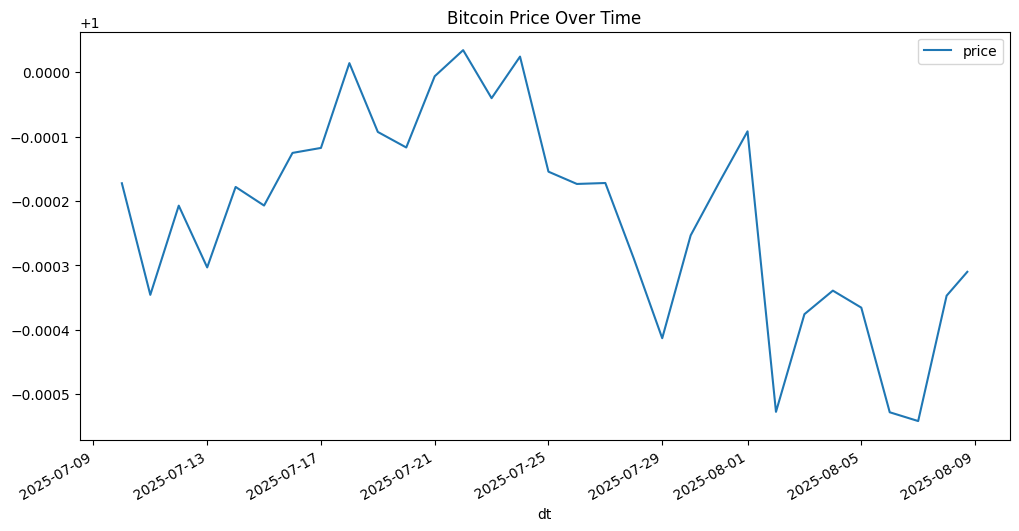

In [ ]:
historical_data_df.plot(title='Bitcoin Price Over Time',figsize=(12,6))# Plotting historical data.

### Fetch historical data within a specific time frame.

Public API end point allow you to fetch historical data for a specific coin within the last 365 days

In [223]:
coin='bitcoin' # Parsed as path parameter.
params={
    'vs_currency': 'usd',
    'from':int(pd.Timestamp('2025-01-01').timestamp()), # Start date in unix time stamp format.
    'to':int(pd.Timestamp('2025-08-08').timestamp()) # End date in unix time stamp format.
}

r=requests.get(coingecko_url+ f'/coins/{coin}/market_chart/range',params=params, headers=headers)
r.raise_for_status() # Raises an error for bad responses(4xx or5xx status codes)
data=r.json() # Parsing the JSON response

In [224]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # Pretty print JSON response with an indentation of 4 spaces.

API Response:
{
    "prices": [
        [
            1735689600000,
            93507.85874741491
        ],
        [
            1735776000000,
            94384.1761153871
        ],
        [
            1735862400000,
            96852.14681235075
        ],
        [
            1735948800000,
            98084.34279280754
        ],
        [
            1736035200000,
            98256.73876849933
        ],
        [
            1736121600000,
            98364.58946599838
        ],
        [
            1736208000000,
            102229.39453189743
        ],
        [
            1736294400000,
            96952.09886774956
        ],
        [
            1736380800000,
            95016.71440989176
        ],
        [
            1736467200000,
            92376.27578346101
        ],
        [
            1736553600000,
            94736.6267420969
        ],
        [
            1736640000000,
            94559.55167224213
        ],
        [
            17367264000

### List all coin categories available on coin gecko

List of categories CG supports.

In [225]:
r=requests.get(coingecko_url+ '/coins/categories/list',headers=headers)
r.raise_for_status() # Raises an error for bad responses(4xx or5xx status codes)
data=r.json() # Parsing the JSON response

In [226]:
# Display the data
print(f'API Response:\n{json.dumps(data, indent=4)}') # Pretty print JSON response with an indentation of 4 spaces.

API Response:
[
    {
        "category_id": "4chan-themed",
        "name": "4chan-Themed"
    },
    {
        "category_id": "8bit-chain-ecosystem",
        "name": "8Bit Chain Ecosystem"
    },
    {
        "category_id": "aave-tokens",
        "name": "Aave Tokens"
    },
    {
        "category_id": "abstract-ecosystem",
        "name": "Abstract Ecosystem"
    },
    {
        "category_id": "account-abstraction",
        "name": "Account Abstraction"
    },
    {
        "category_id": "action-games",
        "name": "Action Games"
    },
    {
        "category_id": "adidas-ecosystem",
        "name": "Adidas Ecosystem"
    },
    {
        "category_id": "adventure-games",
        "name": "Adventure Games"
    },
    {
        "category_id": "aelf-ecosystem",
        "name": "Aelf Ecosystem"
    },
    {
        "category_id": "ai-agent-launchpad",
        "name": "AI Agent Launchpad"
    },
    {
        "category_id": "ai-agents",
        "name": "AI Agents"
    },
    {
 

In [227]:
pd.DataFrame(data) # Convert the list of categories to a DataFrame for better visualization

category_id                   name
0             4chan-themed           4chan-Themed
1     8bit-chain-ecosystem   8Bit Chain Ecosystem
2              aave-tokens            Aave Tokens
3       abstract-ecosystem     Abstract Ecosystem
4      account-abstraction    Account Abstraction
..                     ...                    ...
663  zklink-nova-ecosystem  zkLink Nova Ecosystem
664       zksync-ecosystem       ZkSync Ecosystem
665          zodiac-themed          Zodiac-Themed
666             zoo-themed             Zoo-Themed
667         zora-ecosystem         Zora Ecosystem

[668 rows x 2 columns]

# Error and Rate Limit handling.

### Common issues
429 Too many requests: Hit rate limit(wait 1 min).

404 Not Found: Wrong end point URL.

401 Unauthorized: Invalid/missing API key.

### Pro tip
Use time.sleep(1) between requests to avoid bans. This especially applies to pagination.